In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
# 데이터 분할
x = np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [16]:
train, test = train_test_split(x)
print(f"train data : {train}, test data : {test}")

train data : [ 7 18  3 14 16  4 10  1 15  6 13 12  8 19  0], test data : [ 5  9 17  2 11]


In [20]:
# 교차검증
fold = KFold(n_splits=4)
for train, test in fold.split(x):
    print(f"train data : {train}, test data : {test}")

train data : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], test data : [0 1 2 3 4]
train data : [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19], test data : [5 6 7 8 9]
train data : [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19], test data : [10 11 12 13 14]
train data : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], test data : [15 16 17 18 19]


In [23]:
# 표준화
# 적용전
data = pd.DataFrame(data=np.random.randn(5,5), columns=["A","B","C","D","E"])
data.describe().round(3)

,A,B,C,D,E
count,5.000,5.000,5.000,5.000,5.000
mean,0.029,-0.272,0.550,-0.285,-0.615
std,0.466,0.934,1.280,1.046,0.867
min,-0.503,-0.971,-1.008,-1.398,-1.859
25%,-0.281,-0.798,0.066,-1.192,-0.869
50%,-0.080,-0.533,0.462,-0.391,-0.746
75%,0.391,-0.410,0.716,0.641,0.047
max,0.618,1.351,2.514,0.918,0.354


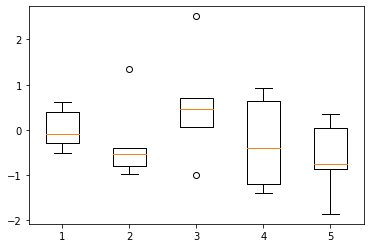

In [25]:
plt.boxplot(data)
plt.show()

In [32]:
df_melt = pd.melt(frame=data, value_vars=["A","B","C","D","E"], var_name='column', value_name='value')
df_melt.head()

,column,value
0,A,-0.503007
1,A,0.391499
2,A,-0.281171
3,A,-0.080227
4,A,0.618398


In [34]:
fig = px.box(data_frame=df_melt, x="column", y="value")
fig